<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/transferlearning_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fine Tuning Implementation of VGG16 for Alzheimer Disease Detection**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC  # Import Support Vector Machine
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import shutil
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from google.colab import drive

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the dataset folder
dataset_path = '/content/drive/MyDrive/archive1'  # Replace with your actual folder path

# Verify the folder structure by listing files
import os
print("Dataset folders:", os.listdir(dataset_path))  # Should show 'train' and 'test' folders

# Paths to train and test folders
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Verify train and test folders
print("Train folder contents:", os.listdir(train_path))
print("Test folder contents:", os.listdir(test_path))

Mounted at /content/drive
Dataset folders: ['train', 'test']
Train folder contents: ['NonDemented', 'Demented']
Test folder contents: ['Demented', 'NonDemented']


In [ ]:
# Step 2: Define image dimensions and batch size
image_size = (224, 224)
batch_size = 32

# Data augmentation setup for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Normalize pixel values to [0, 1]
    rotation_range=30,           # Random rotation up to 30 degrees
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)

# Data generator for the test set (without augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_path,                   # Use the train folder path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',          # For binary classification
    color_mode='rgb',
    shuffle=True
)

# Load and preprocess testing data
test_generator = test_datagen.flow_from_directory(
    test_path,                    # Use the test folder path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

Found 4861 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Import the Rescaling layer correctly
from tensorflow.keras.layers import Rescaling  # Or tf.keras.layers.experimental.preprocessing.Rescaling for older versions

# ... rest of your code ...

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg16_base.trainable = True

#set_trainable = False

#for layer in conv_base.layers:
  #if layer.name == 'block5_conv1':
    #set_trainable = True
  #if set_trainable:
    #layer.trainable = True
  #else:
    #layer.trainable = False

for layer in vgg16_base.layers:
  print(layer.name,layer.trainable)

input_layer True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
vgg16_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Build the model (including all layers, exactly as shown in the diagram)
model = Sequential([
    vgg16_base,                     # VGG16 base model (convolutional layers)
    Flatten(),                      # Flatten the output for Dense layers
    Dense(4096, activation='relu'), # Fully connected layer 1
    Dropout(0.5),                   # Dropout for regularization
    Dense(4096, activation='relu'), # Fully connected layer 2
    Dropout(0.5),                   # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Freeze the pre-trained VGG16 layers to prevent retraining
for layer in vgg16_base.layers:
    layer.trainable = False

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 4694s 31s/step - accuracy: 0.5377 - loss: 0.9512 - val_accuracy: 0.5097 - val_loss: 0.7053
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4653s 31s/step - accuracy: 0.5951 - loss: 0.6944 - val_accuracy: 0.6962 - val_loss: 0.6202
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4674s 31s/step - accuracy: 0.6254 - loss: 0.6638 - val_accuracy: 0.5802 - val_loss: 0.6309
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4691s 31s/step - accuracy: 0.6476 - loss: 0.6314 - val_accuracy: 0.6987 - val_loss: 0.6037
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4658s 31s/step - accuracy: 0.6548 - loss: 0.6202 - val_accuracy: 0.5078 - val_loss: 0.7740
Test Accuracy: 50.78%


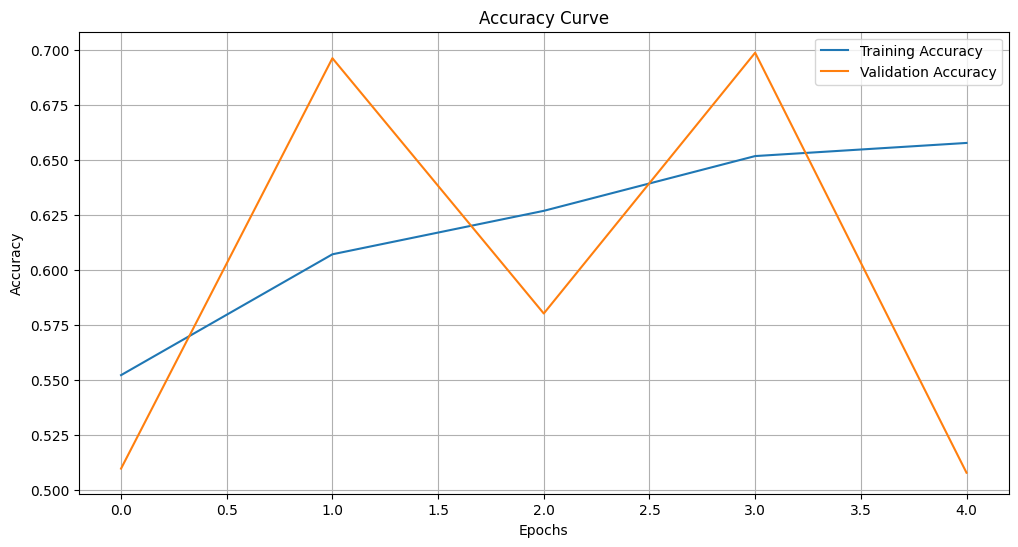

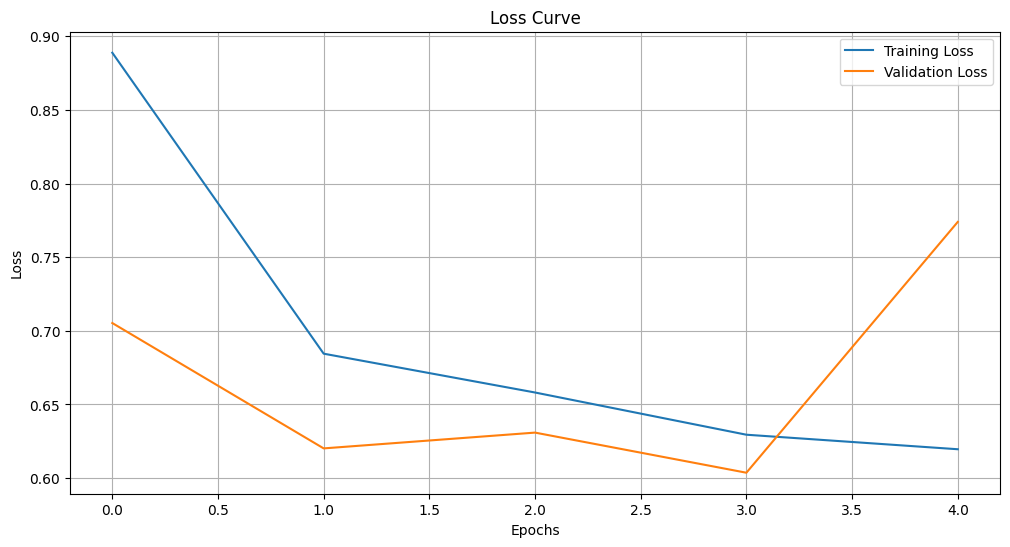

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=5,                       # Adjust epochs as needed
    validation_data=test_generator,
    verbose=1
)
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

# Print total accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
